In [3]:
import numpy  as np
import pandas as pd

In [4]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3173,ham,It vl bcum more difficult..,NaN,NaN,NaN
3404,ham,"Jus chillaxin, what up",NaN,NaN,NaN
660,ham,"Under the sea, there lays a rock. In the rock,...",NaN,NaN,NaN
844,ham,K.k:)when are you going?,NaN,NaN,NaN
4095,ham,"Hey , is * rite u put åÈ10 evey mnth is that all?",NaN,NaN,NaN


In [5]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. WebSite
#8. Deploy

In [6]:
df.shape

(5572, 5)

#1. DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# Drop Last 3 Columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
2861,spam,Adult 18 Content Your video will be with you s...
4289,ham,"For you information, IKEA is spelled with all ..."
3017,ham,I didn't get the second half of that message
5217,ham,Well thats nice. Too bad i cant eat it
5468,spam,URGENT! Last weekend's draw shows that you hav...


In [9]:
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace = True)
df.sample(5)

,target,text
1643,ham,U WILL SWITCH YOUR FONE ON DAMMIT!!
688,ham,Thanks love. But am i doing torch or bold.
1688,ham,Nan sonathaya soladha. Why boss?
2732,ham,How dare you stupid. I wont tell anything to y...
205,ham,ÌÏ say until like dat i dun buy ericsson oso c...


In [10]:
from sklearn.preprocessing import  LabelEncoder
enCoder = LabelEncoder()
df['target'] = enCoder.fit_transform(df['target'])
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Missing Values
df.isnull().sum()

,0
target,0
text,0


In [12]:
# check for dublicate values
df.duplicated().sum()

np.int64(403)

In [13]:
# Remove Duplicate
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

#EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


([<matplotlib.patches.Wedge at 0x7cd3e0198a10>,
 [Text(-1.014499732282844, 0.4251944181172162, 'Not Spam'),
  Text(1.0144998708287172, -0.42519408755122207, 'Spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

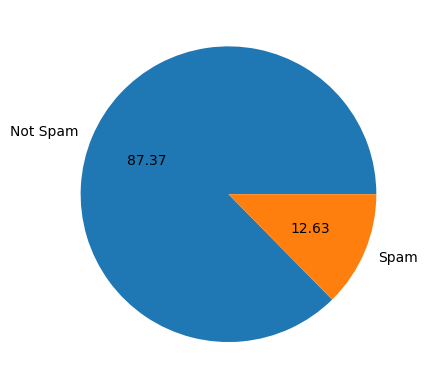

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['Not Spam','Spam'],autopct ='%0.02f')

In [16]:
#Data is imbalanced
import nltk

nltk.download('punkt')

nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:

nltk.word_tokenize("English is a good language")
df['Length'] = df['text'].apply(lambda x : len(x))
df['Num_of_Words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df['Num_of_Sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head(5)



,target,text,Length,Num_of_Words,Num_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
df.describe()

,target,Length,Num_of_Words,Num_of_Sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<Axes: xlabel='Num_of_Words', ylabel='Count'>

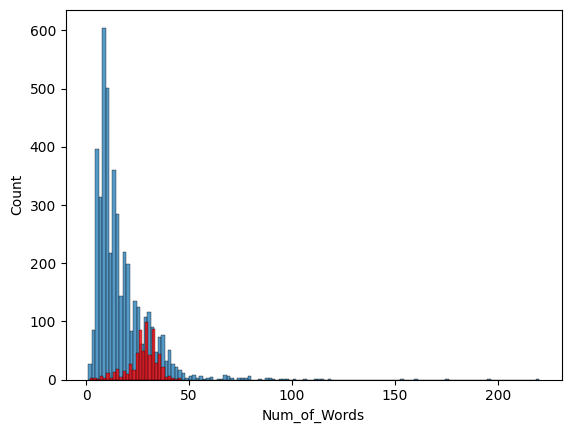

In [20]:
import seaborn as sns
sns.histplot(df[df['target'] == 0]['Num_of_Words'])
sns.histplot(df[df['target'] == 1]['Num_of_Words'],color='red')

## Spam Messages Contains more Words in Avg than not spam  

#DATA PREPROCESSING

In [21]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words[:20])

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as ps
from string import punctuation

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
punct = set(punctuation)
stem = nltk.PorterStemmer()

def text_transform(text):
    text = text.lower()
    words = text.split()

    y = []
    for word in words:
        if word.isalnum() and word not in stop_words:
            word = stem.stem(word)
            y.append(word)

    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df['text_transform'] = df['text'].apply(lambda x : text_transform(x))
df.head(5)

,target,text,Length,Num_of_Words,Num_of_Sentences,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe live around though


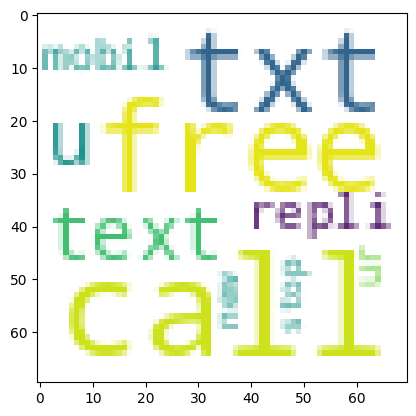

In [24]:
from wordcloud import WordCloud
wc = WordCloud(width=70, height=70, background_color='white')
text = " ".join(df[df['target'] == 1]['text_transform'])
img  = wc.generate(text)
plt.imshow(img)

#Modelling

In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(df['text_transform']).toarray()
X.shape
Y = df['target'].values

In [85]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state = 2)

In [86]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB(alpha=0.5)
bnb = BernoulliNB()

gnb.fit(X_train,Y_train)
y_pred1 = gnb.predict(X_test)

mnb.fit(X_train,Y_train)
y_pred2 = mnb.predict(X_test)

bnb.fit(X_train,Y_train)
y_pred3 = bnb.predict(X_test)


In [87]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix

print("gnb")
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

print("mnb")
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

print("bnb")
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))



gnb
0.7940038684719536
[[707 189]
 [ 24 114]]
0.37623762376237624
mnb
0.9661508704061895
[[892   4]
 [ 31 107]]
0.963963963963964
bnb
0.9709864603481625
[[892   4]
 [ 26 112]]
0.9655172413793104


In [29]:
def train_classification(algo,X_train,Y_train,X_test,Y_test):

    algo.fit(X_train,Y_train)
    y_pred = algo.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    precision = precision_score(Y_test,y_pred)


    return accuracy,precision

In [30]:

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier


In [31]:
svc = SVC(kernel='sigmoid', gamma=1.0)

knc = KNeighborsClassifier()



dtc = DecisionTreeClassifier(max_depth=5)

lr = LogisticRegression(solver='liblinear', penalty='l1')

rfc = RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)

bc = BaggingClassifier(n_estimators=50, random_state=2)

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

xgb = XGBClassifier(n_estimators=50, random_state=2)


In [44]:
models = {
    "svc": svc,
    "knc": knc,
    "nb": mnb,
    "dtc": dtc,
    "lr": lr,
    "rfc": rfc,
    "abc": abc,
    "bc": bc,
    "etc": etc,
    "gbdt": gbdt,
    "xgb": xgb
}


In [35]:
accuracy  = []
precision = []


for name,algo in models.items():
  current_accuracy , current_precision = train_classification(algo,X_train,Y_train,X_test,Y_test)
  accuracy.append(current_accuracy)
  precision.append(current_precision)




In [45]:
performance = pd.DataFrame({'Algorithim' : models.keys() , 'Accuracy':accuracy ,'Precision':precision})

In [46]:
performance = performance.sort_values(by=['Precision','Accuracy'], ascending=False)
performance

,Algorithim,Accuracy,Precision
5,rfc,0.971954,0.982301
2,nb,0.963250,0.980769
1,knc,0.905222,0.976190
8,etc,0.971954,0.965812
4,lr,0.958414,0.952381
10,xgb,0.967118,0.940678
0,svc,0.968085,0.933884
9,gbdt,0.947776,0.928571
7,bc,0.955513,0.859375
6,abc,0.925532,0.850575


In [48]:
import pickle
pickle.dump(cv,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))